In [1]:
import json
import websocket
import pandas as pd

assets=['BTCUSDT']

assets=[coin.lower()+'@kline_1m' for coin in assets]

assets

['btcusdt@kline_1m']

In [2]:
def manipulation(source, existing_df):
    rel_data = float(source['data']['k']['c'])
    timestamp = pd.to_datetime(source['data']['E'], unit='ms')
    new_data = pd.DataFrame({'timestamp': [timestamp], 'BTCUSDT': [rel_data]})
    existing_df = existing_df.append(new_data, ignore_index=True)
    return existing_df

In [3]:
assets='/'.join(assets)

df = pd.DataFrame(columns=['timestamp', 'BTCUSDT'])

def on_message(ws,message):
    message=json.loads(message)
    print(message)


In [4]:
socket="wss://stream.binance.com:9443/stream?streams="+assets

In [5]:
ws=websocket.WebSocketApp(socket,on_message=on_message)
ws.run_forever()

{'stream': 'btcusdt@kline_1m', 'data': {'e': 'kline', 'E': 1716146533033, 's': 'BTCUSDT', 'k': {'t': 1716146520000, 'T': 1716146579999, 's': 'BTCUSDT', 'i': '1m', 'f': 3604630886, 'L': 3604631137, 'o': '66287.49000000', 'c': '66276.00000000', 'h': '66289.41000000', 'l': '66272.90000000', 'v': '6.82287000', 'n': 252, 'x': False, 'q': '452249.48443900', 'V': '1.01854000', 'Q': '67507.01356070', 'B': '0'}}}
{'stream': 'btcusdt@kline_1m', 'data': {'e': 'kline', 'E': 1716146535049, 's': 'BTCUSDT', 'k': {'t': 1716146520000, 'T': 1716146579999, 's': 'BTCUSDT', 'i': '1m', 'f': 3604630886, 'L': 3604631383, 'o': '66287.49000000', 'c': '66258.01000000', 'h': '66289.41000000', 'l': '66244.44000000', 'v': '33.27404000', 'n': 498, 'x': False, 'q': '2204991.78063280', 'V': '1.26777000', 'Q': '84023.48085580', 'B': '0'}}}
{'stream': 'btcusdt@kline_1m', 'data': {'e': 'kline', 'E': 1716146537059, 's': 'BTCUSDT', 'k': {'t': 1716146520000, 'T': 1716146579999, 's': 'BTCUSDT', 'i': '1m', 'f': 3604630886, 'L

True

         unix                 date   symbol      open      high       low  \
0  1646106180  2022-03-01 03:43:00  BTC/USD  43046.58  43046.58  43046.58   
1  1646106060  2022-03-01 03:41:00  BTC/USD  43018.23  43046.59  43018.23   
2  1646106000  2022-03-01 03:40:00  BTC/USD  43022.24  43022.24  43016.03   
3  1646105940  2022-03-01 03:39:00  BTC/USD  43035.16  43035.16  42999.44   
4  1646105880  2022-03-01 03:38:00  BTC/USD  43077.82  43077.82  43049.46   

      close  Volume BTC    Volume USD  
0  43046.58    0.000000      0.000000  
1  43046.58    0.142977   6154.673021  
2  43016.03    0.009230    397.037957  
3  42999.44    0.820950  35300.390268  
4  43049.46    0.022210    956.143143  


<Axes: >

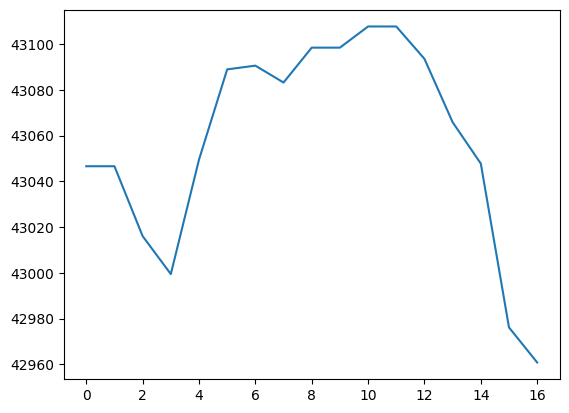

In [7]:
import pandas as pd

# Assuming the CSV data is stored in a file named 'data.csv'
file_path = './BTC-2021min.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
print(df.head())

df['close'].plot()